**Morphology**: A tool for extracting image components that are useful in the representation and description of region shape, such as boundaries, skeletons, and the convex hull.

**Set theory**: The branch of mathematics which deals with the formal properties of sets as units (without regard to the nature of their individual constituents) and the expression of other branches of mathematics in terms of sets.

## Introduction

This topic is best started out with an example. Let's say you've taken some images on a TEM microscope of a fresh batch of nanoparticles. You want to use this to get some information about the size of your nanoparticles. You have access to the resolution of the microscope, and you have calculated the diameter of the size of a few nanoparticles by hand. But shouldn't there be a way to automate this process? You've tried a few simple manipulations in ImageJ by applying an intensity threshold to create a binary image, but you can tell that some objects in the image are noise, while other particles overlap. Both of these create inaccuracies in your size estimates.

How do you approach this problem? This is where the *morphology* toolset comes in handy, and will hopefully aid us in being able to tackle this problem and similar problems.

## Logical Operators

Most of the techniques used in this unit will deal with *binary images*, or images that have pixels that can only take the valueu 0 and 1 (black and white images). Binary image are useful because they allow us to use logical operators. Here's a few examples using some tools from `scikit-image`:

In [110]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology.selem import square, disk, star, diamond, rectangle
from skimage.util import pad

In [79]:
elem1 = np.zeros((31, 42))
elem2 = np.zeros((31, 42))
elem1[:, 0:31] = disk(15)
elem2[:, 11:] = disk(15)
#st_elem = star(10)
#dif_elem = d_elem
int_elem = np.logical_and(elem1, elem2)
un_elem = np.logical_or(elem1, elem2)

n_elem1 = 1 - elem1
n_elem2 = 1 - elem2

xor_elem = np.logical_xor(elem1, elem2)
cxor_elem = 1 - np.logical_xor(elem1, elem2)

Text(0.5, 1.0, 'XOR Complement')

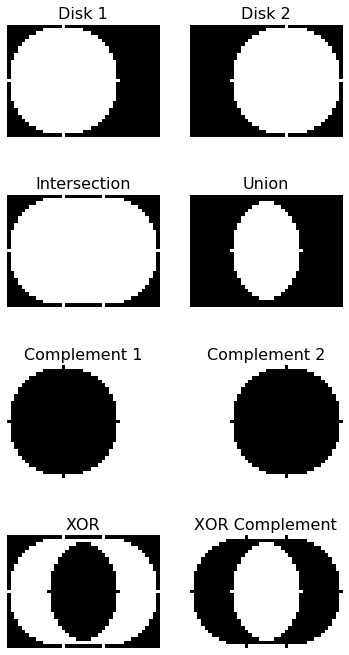

In [80]:
fig, ax = plt.subplots(4, 2, figsize=(6, 12))

ax[0, 0].imshow(elem1, cmap='gray')
ax[0, 0].axis('off')
ax[0, 0].set_title('Disk 1', fontsize=16)

ax[0, 1].imshow(elem2, cmap='gray')
ax[0, 1].axis('off')
ax[0, 1].set_title('Disk 2', fontsize=16)

ax[1, 0].imshow(un_elem, cmap='gray')
ax[1, 0].axis('off')
ax[1, 0].set_title('Intersection', fontsize=16)

ax[1, 1].imshow(int_elem, cmap='gray')
ax[1, 1].axis('off')
ax[1, 1].set_title('Union', fontsize=16)

ax[2, 0].imshow(n_elem1, cmap='gray')
ax[2, 0].axis('off')
ax[2, 0].set_title('Complement 1', fontsize=16)

ax[2, 1].imshow(n_elem2, cmap='gray')
ax[2, 1].axis('off')
ax[2, 1].set_title('Complement 2', fontsize=16)

ax[3, 0].imshow(xor_elem, cmap='gray')
ax[3, 0].axis('off')
ax[3, 0].set_title('XOR', fontsize=16)

ax[3, 1].imshow(cxor_elem, cmap='gray')
ax[3, 1].axis('off')
ax[3, 1].set_title('XOR Complement', fontsize=16)

Some other useful functions that you may need for morphological applications are the **reflection** of an image:

In [74]:
elem = np.zeros((63, 110))
elem[:, 10:73] = diamond(31)

Text(0.5, 1.0, 'Disk 2')

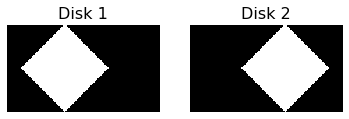

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(6, 9))

ax[0].imshow(elem, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Disk 1', fontsize=16)

#Note how you can implement the reflection just by using indices.
ax[1].imshow(elem[:, ::-1], cmap='gray')
ax[1].axis('off')
ax[1].set_title('Disk 2', fontsize=16)

## Dilation and Erosion

Two of the most basic morphological operations are *dilation* and *erosion*. The words are fairly descriptive: can you guess what these two functions do to a binary image?

In [98]:
from skimage.morphology import binary_erosion as erode
from skimage.morphology import binary_dilation as dilate

In [107]:
im = pad(star(31), 5)
im_er = erode(im, selem=disk(5))
im_dil = dilate(im, selem=disk(5))

Text(0.5, 1.0, 'Dilation')

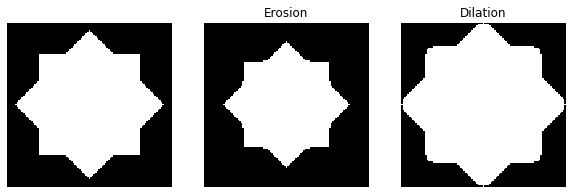

In [109]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))



ax[0].imshow(im, cmap='gray')
ax[0].axis('off')

ax[1].imshow(im_er, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Erosion')

ax[2].imshow(im_dil, cmap='gray')
ax[2].axis('off')
ax[2].set_title('Dilation')

Mathematically, the dilation of A by B is expressed as:

$$A \oplus B = \{ z | (\hat{B})_z  \cap A \neq \emptyset \}$$

This can be read as all elements at location z defined by the intersection of A and the reflection of B shifted z units. Thus, the dilation is the set of all displacements, z, such that B and A overlap by at least one element. You can conceptualize this by sliding the smaller structing element around the image of interest. As long as B and A overlap by at least one unit

B is often called the **structuring element** and is defined as **selem** in `scikit-image`.

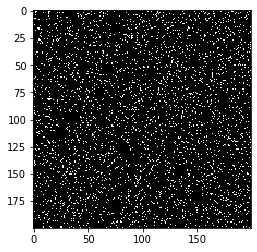

In [96]:
test = np.random.random((200,200))
test = test > 0.92

plt.imshow(test, cmap='gray')